# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Ordinary Differential Equations - Initial Value Problems

In the following you will implement your own easy-to-extend ordinary differential equation (ODE) solver, which can be used to solve first order ODE systems of the form

\begin{align*}
    \vec{y}'(x) = \vec{f}(x, \vec{y}),
\end{align*}

for $x = x_0, x_1, \dots, x_n$ with $x_i = i h$, step size $h$, and an initial condition of the form $\vec{y}(x=0)$.
The solver will be capable of using single-step as well as multi-step approaches.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec

### Task 1

Implement the Euler method in a general Python function $\text{integrator(x, y0, f, phi)}$, which takes as input a one-dimensional array $x$ of size $n+1$, the initial condition $y_0$, the *callable* function $f(x, y)$, and the integration scheme $\Phi(x, y, f, i)$. It should return the approximated function $\tilde{y}(x)$. 

The integration scheme $\text{phi}$ is supposed to be a *callable* function as returned from another Python function $\text{phi_euler(x, y, f, i)}$, where $i$ is the step number. In this way we will be able to easily extend the ODE solver to different methods.

In [2]:
def integrator(x, y0, f, phi):
    """
    Numerically solves the initial value problem (IVP) given by ordinary differential
    equation (ODE) f(x, y) = y' with initial value y0 using the integration scheme
    provided by phi.

    Args:
        x:   size n + 1 numerical array of x values
        y0:  an initial value to the function f
        f:   a callable function with signature (x, y), with x and y the current state
             of the system, and f such that f(x, y) = y' in the ODE
        phi: a callable function with signature (x, y, f, i), with x and y the current state
             of the system, i the step number, and f as above, representing the integration
             scheme to use

    Returns:
        An n + 1 numerical array representing an approximate solution to y in y' = f(x, y)
        given initial value y0, steps from x, and using integration scheme phi.
    """
    
    eta    = np.zeros(len(x))
    eta[0] = y0
    
    for i in range(1, len(eta)):
        h      = x[i] - x[i - 1]
        eta[i] = eta[i - 1] + h*phi(x, eta, f, i)
    
    return eta

In [3]:
def phi_euler(x, y, f, i):
    """
    Returns the integrator phi = f(x, y) for the Euler method to solve the ODE
    y' = f(x, y).

    Args:
        x: size n + 1 numerical array of x values
        y: size n + 1 numerical array of y values with estimates up to index i - 1
        f: a callable function with signature (x, y), with x and y the current state
           variables of the system, and f such that f(x, y) = y' in the ODE
        i: the current step number to calculate phi for

    Returns:
        The integrator phi(x, y, f, i) = f(x, y).
    """
    
    return f(x[i - 1], y[i - 1])

### Task 2 

Debug your implementation by applying it to the following ODE

\begin{align*}
    \vec{y}'(x) = y - x^2 + 1.0,
\end{align*}
        
with initial condition $y(x=0) = 0.5$. To this end, define the right-hand side of the ODE as a Python function $\text{ODEF(x, y)}$, which in this case returns $f(x,y) = y - x^2 + 1.0$. You can then hand over the function $\text{ODEF}$ to the argument $\text{f}$ of your $\text{integrator}$ function.

Plot the solution you found with the Euler method together with the exact solution $y(x) = (x+1)^2 - 0.5 e^x$.

Then implement a unit test for your $\text{integrator}$ function using this system.

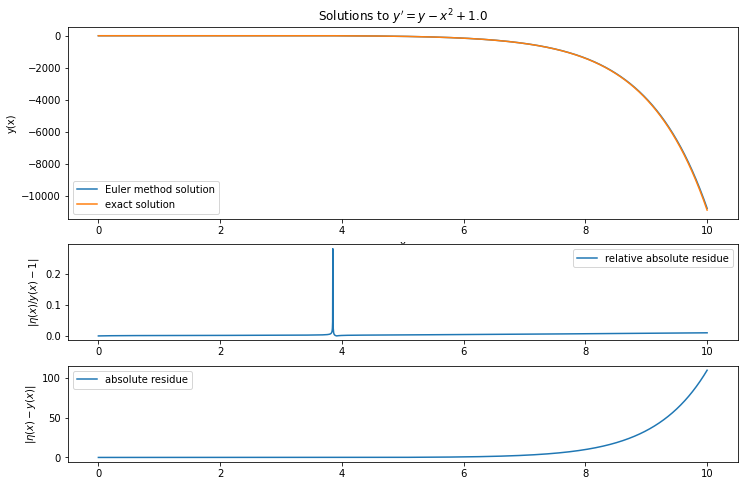


    For the given initial value problem y' = (x + 1)^2 + 1.0, taking x from 0 to 10 in 3000 steps,
    we find a large deviation between exact and estimate solutions at the point that y' = 0.
    We could fix this by taking some other measure, like the absolute difference, but as
    the solutions decrease so hard, that will suck later on.
    


In [4]:
# This here is for debugging. We thought the keep it here,
# as debugging was part of the task.

def ODEF(x, y):
    return y - x**2 + 1.0

x = np.linspace(0, 10, 3000)
y0 = .5

eta = integrator(x, y0, ODEF, phi_euler)
y_exact = (x + 1)**2 - 0.5*np.exp(x)

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])

# Above plots
ax0 = plt.subplot(gs[0])
ax0.plot(x, eta, label="Euler method solution")
ax0.plot(x, y_exact, label="exact solution")
ax0.legend()
plt.title("Solutions to $y' = y - x^2 + 1.0$")
plt.xlabel("x")
ax0.set_ylabel("y(x)")

# Relative absolute residue plots
ax1 = plt.subplot(gs[1])
ax1.plot(x, np.abs(eta/y_exact - 1), label="relative absolute residue")
ax1.legend()
ax1.set_ylabel("$|\eta(x)/y(x) - 1|$")

# Absolute residue plots
ax2 = plt.subplot(gs[2])
ax2.plot(x, np.abs(eta - y_exact), label="absolute residue")
ax2.legend()
ax2.set_ylabel("$|\eta(x) - y(x)|$")

plt.show()

print("""
    For the given initial value problem y' = (x + 1)^2 + 1.0, taking x from 0 to 10 in 3000 steps,
    we find a large deviation between exact and estimate solutions at the point that y' = 0.
    We could fix this by taking some other measure, like the absolute difference, but as
    the solutions decrease so hard, that will suck later on.
    """)

In [5]:
def test_integrator():
    def ODEF(x, y):
        return y - x**2 + 1.0
    
    x = np.linspace(0, 3, 100000)
    y0 = .5

    eta = integrator(x, y0, ODEF, phi_euler)
    y_exact = (x + 1)**2 - 0.5*np.exp(x)
    
    # Assert the relative error of the approximation is lower than TOL.
    TOL = 1e-4
    assert np.all(np.abs(eta/y_exact - 1) < TOL)
    
test_integrator()

### Task 3

Extend the set of possible single-step integration schemes to the modified Euler (Collatz), Heun, and 4th-order Runge-Kutta approaches by implementing the functions $\text{phi_euler_modified(x, y, f, i)}$, $\text{phi_heun(x, y, f, i)}$, and $\text{phi_rk4(x, y, f, i)}$. These can be used in your $\text{integrator}$ function instead of $\text{phi_euler}$.

In [ ]:
def phi_euler_modified(x, y, f, i):
    # YOUR CODE HERE
    raise NotImplementedError()
    
def phi_heun(x, y, f, i):
    # YOUR CODE HERE
    raise NotImplementedError()
    
def phi_rk4(x, y, f, i):
    # YOUR CODE HERE
    raise NotImplementedError()

### Task 4

Add the possibility to also handle the following multi-step integration schemes:

\begin{align*}
    \Phi_{AB3}(x, y, f, i) = 
    \frac{1}{12} \left[ 
        23 f(x_i, y_i) 
        - 16 f(x_{i-1}, y_{i-1})
        + 5 f(x_{i-2}, y_{i-2})
    \right]
\end{align*}

and

\begin{align*}
\Phi_{AB4}(x, y, f, i) = 
    \frac{1}{24} \left[ 
        55 f(x_i, y_i) 
        - 59 f(x_{i-1}, y_{i-1})
        + 37 f(x_{i-2}, y_{i-2})
        - 9 f(x_{i-3}, y_{i-3})
    \right]
\end{align*}
        
In these cases the initial condition $\text{y0}$ must be an array consisting of several initial values corresponding to $y_0$, $y_1$, $y_2$ (and $y_3$). Use the Runga-Kutta method to calculate all of the initial values before you start the AB3 and AB4 integrations.

In [ ]:
def phi_ab3(x, y, f, i):
    # YOUR CODE HERE
    raise NotImplementedError()

def phi_ab4(x, y, f, i):
    # YOUR CODE HERE
    raise NotImplementedError()

### Task 5

Plot the absolute errors $\delta(x) = |\tilde{y}(x) - y(x)|$ with a $y$-log scale for all approaches with $0 \leq x \leq 2$ and a step size of $h=0.02$ for the ODE from task 2.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Task 6

Study the accuracies of all approaches as a function of the step size $h$. To this end use your implementations to solve

\begin{align*}
    \vec{y}'(x) = y
\end{align*}
        
with $y(x=0) = 1.0$ for $0 \leq x \leq 2$. 

Plot $\delta(2) = |\tilde{y}(2) - y(2)|$ as a function of $h$ for each integration scheme.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Task 7

Apply the Euler and the Runga-Kutta methods to solve the pendulum problem given by

\begin{align*}
    \vec{y}'(x) = \vec{f}(x, \vec{y})
    \quad \leftrightarrow \quad 
    \begin{pmatrix}
    y_0'(x) \\
    y_1'(x)
    \end{pmatrix}
    =
    \begin{pmatrix}
        y_1(x) \\
        -\operatorname{sin}\left[y_0(x)  \right]
    \end{pmatrix}
\end{align*}
        
To this end the quantities $\text{x}$ and $\text{y0}$ in your $\text{integrator}$ function must become vectors. Depending on your implementation in task 1 you might have to define a new $\text{integrator}$ function that can handle this type of input.

Plot $y_0(x)$ for several oscillation periods. Does the Euler method behave physically?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()